In [49]:
import pandas as pd
df = pd.read_csv("fatalities_isr_pse_conflict_2000_to_2023.csv")


In [50]:
df.head()


,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,2023-09-24,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while standing ...
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,2023-09-24,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while trying to...
2,'Abdallah 'Imad Sa'ed Abu Hassan,2023-09-22,16.0,Palestinian,Kfar Dan,Jenin,West Bank,2023-09-22,M,NaN,al-Yamun,Jenin,gunfire,live ammunition,Israeli security forces,Fatally shot by soldiers while firing at them ...
3,Durgham Muhammad Yihya al-Akhras,2023-09-20,19.0,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,2023-09-20,M,NaN,'Aqbat Jaber R.C.,Jericho,gunfire,live ammunition,Israeli security forces,Shot in the head by Israeli forces while throw...
4,Raafat 'Omar Ahmad Khamaisah,2023-09-19,15.0,Palestinian,Jenin R.C.,Jenin,West Bank,2023-09-19,M,NaN,Jenin,Jenin,gunfire,live ammunition,Israeli security forces,Wounded by soldiers’ gunfire after running awa...


In [51]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11124 entries, 0 to 11123
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          11124 non-null  object 
 1   date_of_event                 11124 non-null  object 
 2   age                           10995 non-null  float64
 3   citizenship                   11124 non-null  object 
 4   event_location                11124 non-null  object 
 5   event_location_district       11124 non-null  object 
 6   event_location_region         11124 non-null  object 
 7   date_of_death                 11124 non-null  object 
 8   gender                        11104 non-null  object 
 9   took_part_in_the_hostilities  9694 non-null   object 
 10  place_of_residence            11056 non-null  object 
 11  place_of_residence_district   11056 non-null  object 
 12  type_of_injury                10833 non-null  object 
 13  a

In [52]:
df.describe()


,age
count,10995.000000
mean,26.745703
std,13.780548
min,1.000000
25%,19.000000
50%,23.000000
75%,31.000000
max,112.000000


In [53]:
df.columns
df.dtypes


name                             object
date_of_event                    object
age                             float64
citizenship                      object
event_location                   object
event_location_district          object
event_location_region            object
date_of_death                    object
gender                           object
took_part_in_the_hostilities     object
place_of_residence               object
place_of_residence_district      object
type_of_injury                   object
ammunition                       object
killed_by                        object
notes                            object
dtype: object

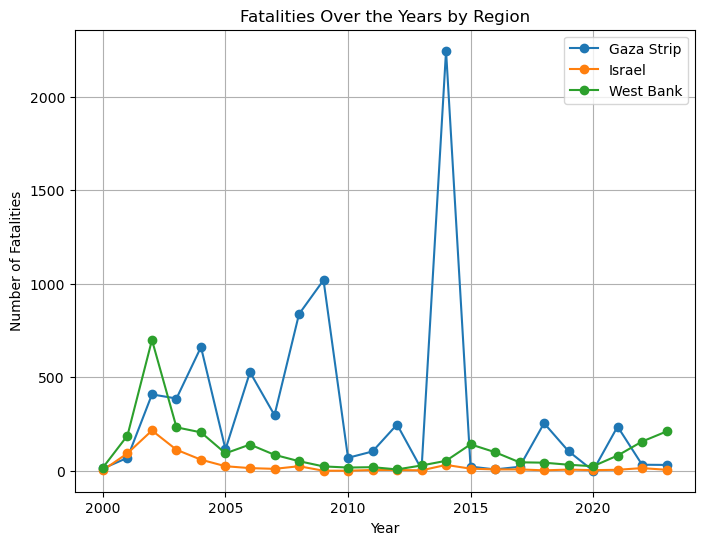

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_fatalities_by_region(data):
    data['date_of_event'] = pd.to_datetime(data['date_of_event'])

    events_by_year_region = data.groupby([data['date_of_event'].dt.year, 'event_location_region'])['date_of_event'].count().unstack()
    
    plt.figure(figsize=(8, 6))
    for region in events_by_year_region.columns:
        plt.plot(events_by_year_region.index, events_by_year_region[region], marker='o', label=region)

    plt.xlabel('Year')
    plt.ylabel('Number of Fatalities')
    plt.title('Fatalities Over the Years by Region')
    plt.legend()
    plt.grid(True)
    
    plt.show()
data = pd.read_csv("fatalities_isr_pse_conflict_2000_to_2023.csv")
plot_fatalities_by_region(data)


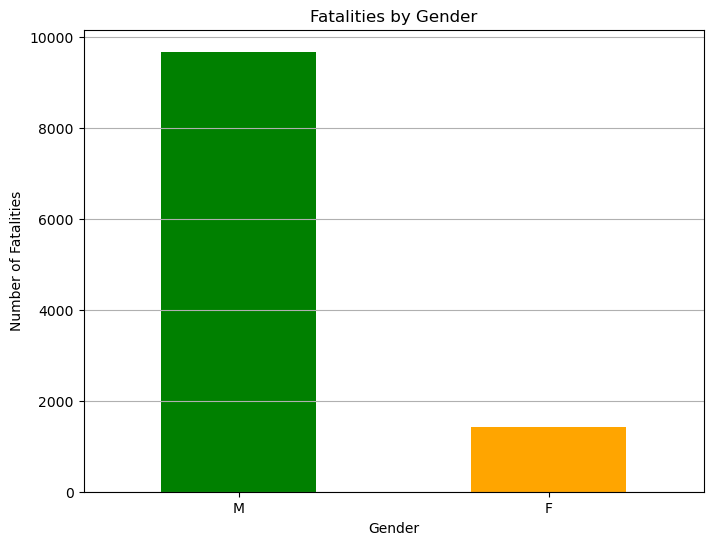

In [55]:


def plot_fatalities_by_gender(data):
    gender_counts = data['gender'].value_counts()

    colors = ['green', 'orange']

    plt.figure(figsize=(8, 6))
    gender_counts.plot(kind='bar', color=colors)
    plt.xlabel('Gender')
    plt.ylabel('Number of Fatalities')
    plt.title('Fatalities by Gender')
    plt.xticks(rotation=0)
    plt.grid(axis='y')
    plt.show()

data = pd.read_csv("fatalities_isr_pse_conflict_2000_to_2023.csv")

plot_fatalities_by_gender(data)


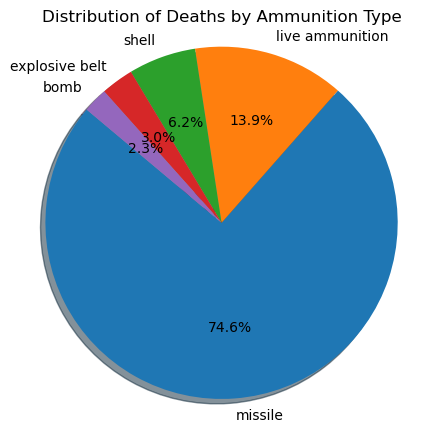

In [57]:


def plot_deaths_distribution(data, threshold):
    filtered_data = {k: v for k, v in data.items() if v >= threshold}
    plt.figure(figsize=(5, 5))
    labels = filtered_data.keys()
    sizes = filtered_data.values()
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')
    plt.title('Distribution of Deaths by Ammunition Type')
    plt.show()

data = {
    'missile': 8130,
    'live ammunition': 1514,
    'shell': 675,
    'explosive belt': 326,
    'bomb': 249,
    'mortar fire': 51,
    'knife': 37,
    'flechette shells': 22,
    'rubber-coated metal bullets': 19,
    '0.22-caliber bullets': 16,
    'phosphorus shell': 16,
    'Qassam rocket': 15,
    'car bomb': 15,
    'teargas canister': 13,
    'rocket': 12,
    'grad rocket': 7,
    'sponge rounds': 2,
    'grenade': 2,
    'flare bomb': 1,
    'stun grenade': 1,
    'rock': 1
}

threshold = 100
plot_deaths_distribution(data, threshold)
